## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import my libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import data
data = pd.read_csv("data/cleaned_data.csv")
data.head()

,distance,consume,temp_inside,temp_outside,gas_type,ac,rain,sun,fuel_used,cost_of_trip,trip_in_hours,avg_speed
0,28.0,5.0,21.5,12,E10,0,0,0,1.4000,2.863,0.433333,64.615385
1,12.0,4.2,21.5,13,E10,0,0,0,0.5040,1.031,0.500000,24.000000
2,11.2,5.5,21.5,15,E10,0,0,0,0.6160,1.260,0.633333,17.684211
3,12.9,3.9,21.5,14,E10,0,0,0,0.5031,1.029,0.600000,21.500000
4,18.5,4.5,21.5,15,E10,0,0,0,0.8325,1.702,0.766667,24.130435


In [4]:
data_num = data.select_dtypes(np.number)
data_cat = data.select_dtypes(object)

In [5]:
#checking for correlations and heat map
correlations = data_num.corr()
correlations

,distance,consume,temp_inside,temp_outside,ac,rain,sun,fuel_used,cost_of_trip,trip_in_hours,avg_speed
distance,1.000000,-0.128967,0.077636,0.088175,-0.025738,-0.019791,0.081120,0.992101,0.990944,0.562299,0.884942
consume,-0.128967,1.000000,-0.154953,-0.320811,0.096591,0.248118,-0.170667,-0.052188,-0.051965,-0.227866,-0.177825
temp_inside,0.077636,-0.154953,1.000000,0.357431,0.300407,-0.035199,0.241530,0.065359,0.064781,0.060039,0.069588
temp_outside,0.088175,-0.320811,0.357431,1.000000,0.167562,-0.186315,0.346903,0.037877,0.040100,0.015411,0.107179
ac,-0.025738,0.096591,0.300407,0.167562,1.000000,0.242915,0.088598,-0.018700,-0.017403,-0.035408,-0.009260
rain,-0.019791,0.248118,-0.035199,-0.186315,0.242915,1.000000,-0.112650,0.009125,0.011388,0.009489,-0.027300
sun,0.081120,-0.170667,0.241530,0.346903,0.088598,-0.112650,1.000000,0.064247,0.065632,0.081618,0.058150
fuel_used,0.992101,-0.052188,0.065359,0.037877,-0.018700,0.009125,0.064247,1.000000,0.999497,0.551847,0.868658
cost_of_trip,0.990944,-0.051965,0.064781,0.040100,-0.017403,0.011388,0.065632,0.999497,1.000000,0.546884,0.867029
trip_in_hours,0.562299,-0.227866,0.060039,0.015411,-0.035408,0.009489,0.081618,0.551847,0.546884,1.000000,0.245061


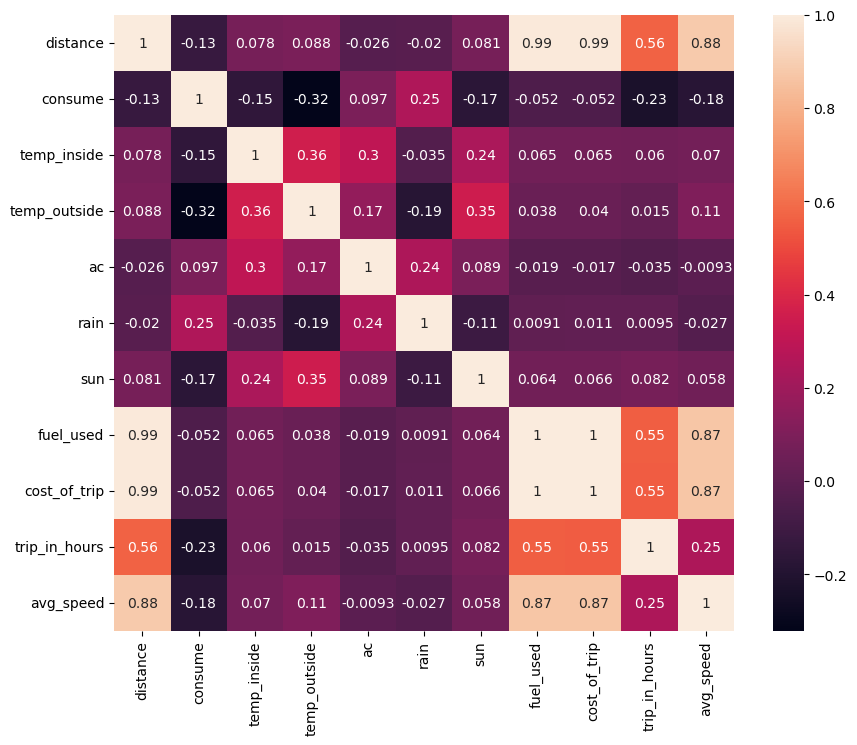

In [6]:
#heat map
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations, annot = True)
plt.show()

High colinearity present (0.99), but it comes from the columns that were created and that are derived from the data. Therefore this explains the high colinearlity, and they will need to be dropped for a more robust prediction model. 

In [7]:
cols_to_drop = ["avg_speed", "cost_of_trip", "fuel_used"]

In [8]:
data = data.drop(cols_to_drop, axis= 1)

# 1. X(features)-y(target) Split to predict the amount of fuel consumed

In [9]:
X = data.drop("consume", axis = 1)
y = data["consume"]

# 2. Train - test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 13)

In [11]:
#cat/numm divide for scaling
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

# 3. Data transformation and  scaling: numerical data


## Fit AND transforming train first

In [12]:
scaler = MinMaxScaler().fit(X_train_num)
#transformin train data only
X_train_norm = scaler.transform(X_train_num)

In [13]:
#creating a DF
X_train_num_scale = pd.DataFrame(X_train_norm, index = X_train_num.index, columns = X_train_num.columns)
X_train_num_scale.head()

,distance,temp_inside,temp_outside,ac,rain,sun,trip_in_hours
158,0.095079,0.384615,0.388889,0.0,1.0,0.0,0.410959
162,0.246058,0.384615,0.194444,0.0,0.0,0.0,0.780822
283,0.145246,0.461538,0.583333,0.0,0.0,0.0,0.493151
79,0.158146,0.153846,0.250000,0.0,0.0,0.0,0.191781
336,0.065456,0.384615,0.722222,0.0,0.0,0.0,0.493151


## Only transforming test

In [14]:
X_test_norm = scaler.transform(X_test_num)
#creating a DF

X_test_num_scale = pd.DataFrame(X_test_norm, index = X_test_num.index, columns = X_test_num.columns)
X_test_num_scale.head()

,distance,temp_inside,temp_outside,ac,rain,sun,trip_in_hours
373,0.064978,0.769231,0.888889,1.0,0.0,0.0,0.027397
269,0.065456,0.461538,0.527778,0.0,0.0,0.0,0.493151
109,0.071190,0.307692,0.333333,0.0,0.0,0.0,0.575342
27,0.079790,0.384615,0.222222,0.0,0.0,0.0,0.191781
242,0.035834,0.538462,0.361111,0.0,1.0,0.0,0.260274


# 4. Data transformation and  scaling: categorical data


In [18]:
X_train_cat["gas_type"]=np.where(X_train_cat["gas_type"]=="E10",1,0)
X_train_cat["gas_type"]
#Another option is using map() function:
#X_train_cat["gas_type"] = X_train_cat["gas_type"].map({"E10": 1, "SP98": 0})

158    0
162    0
283    0
79     0
336    0
      ..
230    0
16     0
74     0
176    0
338    0
Name: gas_type, Length: 310, dtype: int64

In [17]:
X_test_cat["gas_type"]=np.where(X_test_cat["gas_type"]=="E10",1,0)
X_test_cat["gas_type"]

373    0
269    1
109    0
27     1
242    1
      ..
125    0
310    0
54     0
240    1
273    1
Name: gas_type, Length: 78, dtype: int64

# 5. Merge all cat + num together

In [21]:
X_train = pd.concat([X_train_cat, X_train_num], axis = 1)
X_test = pd.concat([X_test_cat, X_test_num], axis = 1)

# 6. Modelling 1: Linear Regression

In [22]:
lm = LinearRegression() #import the model
lm.fit(X_train, y_train) #model fit to train data
y_pred_lm = lm.predict(X_test) #predict test data

In [23]:
# measuring model
print("the r2 is:", lm.score(X_test, y_test))

the r2 is: 0.11410474890154776


R2 is very low, giving a very low result to our model. 

# 7. Looking at other models

In [26]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train) #fit first on training data
        print(f"{model.__class__.__name__}:Train -> {model.score(X_train,y_train)}, Test -> {model.score(X_test, y_test)}")

In [27]:
model_list = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor()]
#calling the function
models_automation(model_list, X_train, y_train)

LinearRegression:Train -> 0.23467531923977758, Test -> 0.11410474890154776
KNeighborsRegressor:Train -> 0.6215555396068315, Test -> 0.5295958695718983
DecisionTreeRegressor:Train -> 0.9999195353712774, Test -> 0.3332308921601771


To predict the consumption of fuel the best model is KNeighbors. 